# Naive Bayes Classification

Suppose we are using an API to gather articles from a news website and grabbing phrases from two different types of articles: on **sports** and on **politics**.

Is there a way we can use machine learning to help us label the articles quickly?

#### Example Data

In [1]:
sports = ['the match was close',
          'the coaches agreed on strategy',
          'played in a sold out stadium']

politics = ['world leaders met last week',
            'the election was close',
            'the officials agreed on a compromise']

test_statement = 'world leaders agreed to fund the stadium'

### Bringing Back Bayes

> "Naive Bayes classifiers are linear classifiers that are known for being **simple yet very efficient**. The probabilistic model of naive Bayes classifiers is based on Bayes’ theorem, and the adjective naive comes from the assumption that the features in a dataset are **mutually independent**. In practice, the independence assumption is often violated, but naive Bayes classifiers **still tend to perform very well** under this unrealistic assumption. Especially for small sample sizes, naive Bayes classifiers can outperform the more powerful alternatives."

[Source: Sebasitian Raschka: Naive Bayes and Text Classification](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html) (emphasis is mine)

Revisiting the theorem itself:

![breaking down the function behind naive bayes](images/naive_bayes_icon.png)

####  Another way of looking at it

![further breakdown of the pieces of naive bayes](images/another_one.png)

### So, in the context of our problem:


## $ P(politics | document) = \frac{P(document|politics)P(politics)}{P(document)}$

## $ P(politics) = \frac{\# politics\ documents}{\# all\ documents} $

Where *phrase* is our test statement

### How should we calculate $ P(politics) $ ?

This is essentially the distribution of the probability of either type of article. We have three of each type of article, therefore, we assume that there is an equal probability of either article

In [2]:
# going back to our intro example data...
p_politics = len(politics)/(len(politics) + len(sports))
p_politics

In [3]:
p_sports = len(sports)/(len(politics) + len(sports))
p_sports

### How should we calculate $ P(phrase | politics) $ ?

- we need to break the phrases down into individual words


## $ P(phrase | politics) = \prod_{i=1}^{d} P(word_{i} | politics) $

### We need to make a *Naive* assumption.

- assuming independence for each word


### $ P(word_{i} | politics) = \frac{\#\ of\ word_{i}\ in\ politics\ docs} {\#\ of\ total\ words\ in\ politics\ docs} $

### Can you foresee any issues with this?

- we can't have a probability of 0, which would happen if the model encounters a word it's never seen before


## Enter: Laplace Smoothing

## $ P(word_{i} | politics) = \frac{\#\ of\ word_{i}\ in\ politics\ docs + \alpha} {\#\ of\ total\ words\ in\ politics\ docs + \alpha d} $

## $ P(word_{i} | music) = \frac{\#\ of\ word_{i}\ in\ music\ docs + \alpha} {\#\ of\ total\ words\ in\ music\ docs + \alpha d} $

This correction process is called Laplace Smoothing:

- d : number of features (in this instance total number of vocabulary words)
- $\alpha$ can be any number greater than 0 (it is usually 1)

### Now let's calculate this...

In [4]:
print(sports)
print(politics)

| word       | frequency in politics | frequency in sports |
| ---------- | --------------------- | ------------------- |
| the        |  2                    | 2                   |
| match      |  0                    | 1                   |
| was        |  1                    | 1                   |
| close      |  1                    | 1                   |
| coaches    |  0                    | 1                   |
| agreed     |  1                    | 1                   |
| on         |  1                    | 1                   |
| strategy   |  0                    | 1                   |
| played     |  0                    | 1                   |
| in         |  0                    | 1                   |
| a          |  1                    | 1                   |
| sold       |  0                    | 1                   |
| out        |  0                    | 1                   |
| stadium    |  0                    | 1                   |
| world      |  1                    | 0                   |
| leaders    |  1                    | 0                   |
| met        |  1                    | 0                   |
| last       |  1                    | 0                   |
| week       |  1                    | 0                   |
| election   |  1                    | 0                   |
| officials  |  1                    | 0                   |
| compromise |  1                    | 0                   |

> Test sentence: 'world leaders agreed to fund the stadium'

| word    | $ P( word | politics) $ | $ P( word | sports) $   |
| ------- | ----------------------- | ----------------------- |
| world   | $\frac{1 + 1}{15 + 30}$ | $\frac{0 + 1}{15 + 30}$ |
| leaders | $\frac{1 + 1}{15 + 30}$ | $\frac{0 + 1}{15 + 30}$ |
| agreed  | $\frac{1 + 1}{15 + 30}$ | $\frac{1 + 1}{15 + 30}$ |
| to      | $\frac{0 + 1}{15 + 30}$ | $\frac{0 + 1}{15 + 30}$ |
| fund    | $\frac{0 + 1}{15 + 30}$ | $\frac{0 + 1}{15 + 30}$ |
| the     | $\frac{2 + 1}{15 + 30}$ | $\frac{2 + 1}{15 + 30}$ |
| stadium | $\frac{0 + 1}{15 + 30}$ | $\frac{1 + 1}{15 + 30}$ |

I dunno about you... but I'm already exhausted trying to do this from scrach, and that's just a single sentence. Let's move into Python.

In [5]:
# Initial imports

import numpy as np
np.random.seed(123)
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [6]:
def vocab_maker(category):
    """returns the vocabulary for a given type of article"""
    vocab_category = set()
    for art in category:
        words = art.split()
        for word in words:
            vocab_category.add(word)
    return vocab_category
        
voc_sports = vocab_maker(sports)
voc_pol = vocab_maker(politics)
total_vocabulary = voc_sports.union(voc_pol)


In [7]:
voc_sports

{'a',
 'agreed',
 'close',
 'coaches',
 'in',
 'match',
 'on',
 'out',
 'played',
 'sold',
 'stadium',
 'strategy',
 'the',
 'was'}

In [8]:
voc_pol

{'a',
 'agreed',
 'close',
 'compromise',
 'election',
 'last',
 'leaders',
 'met',
 'officials',
 'on',
 'the',
 'was',
 'week',
 'world'}

In [9]:
total_vocabulary

{'a',
 'agreed',
 'close',
 'coaches',
 'compromise',
 'election',
 'in',
 'last',
 'leaders',
 'match',
 'met',
 'officials',
 'on',
 'out',
 'played',
 'sold',
 'stadium',
 'strategy',
 'the',
 'was',
 'week',
 'world'}

In [10]:
total_vocab_count = len(total_vocabulary)
total_sports_count = len(voc_sports)
total_politics_count = len(voc_pol)

In [11]:
def find_number_words_in_category(phrase,category):
    statement = phrase.split()
    str_category=' '.join(category)
    cat_word_list = str_category.split()
    word_count = defaultdict(int)
    for word in statement:
        for art_word in cat_word_list:
            if word == art_word:
                word_count[word] +=1
            else:
                word_count[word]
    return word_count

In [12]:
test_sports_word_count = find_number_words_in_category(test_statement,sports)
test_sports_word_count

defaultdict(int,
            {'world': 0,
             'leaders': 0,
             'agreed': 1,
             'to': 0,
             'fund': 0,
             'the': 2,
             'stadium': 1})

In [13]:
test_politic_word_count = find_number_words_in_category(test_statement,politics)
test_politic_word_count

defaultdict(int,
            {'world': 1,
             'leaders': 1,
             'agreed': 1,
             'to': 0,
             'fund': 0,
             'the': 2,
             'stadium': 0})

In [14]:
def find_likelihood(category_count,test_category_count,alpha):
    num = np.product(np.array(list(test_category_count.values())) + alpha)
    denom = (category_count + total_vocab_count*alpha)**(len(test_category_count))
    
    return num/denom

In [15]:
likelihood_sports = find_likelihood(total_sports_count,test_sports_word_count,1)

In [16]:
likelihood_politics = find_likelihood(total_politics_count,test_politic_word_count,1)

In [17]:
print(likelihood_sports)
print(likelihood_politics)

1.5313121933259447e-10
3.0626243866518893e-10


### $ P(politics | article) = P(politics) x \prod_{i=1}^{d} P(word_{i} | politics) $

#### Determing the winner of our model:

![](images/solvingforyhat.png)

In [18]:
# p(politics|article) > p(music|article)
(likelihood_politics * p_politics) > (likelihood_sports * p_sports)

True

### Pros:

* It is an efficient way to predict class of test data set. It perform well in multi class prediction
* When assumption of independence holds, a Naive Bayes classifier performs requires less training data and can perform better than models like logistic regression.
* Performs better with categorical inputs. For numerical input, one has to assume a normal distribution.

### Cons:

* Naive Bayes is also known as a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously
* We are assuming of independent predictors, but in real life, it is almost impossible that we get a set of predictors which are completely independent (amazingly, still works a lot of the time though!)

... but let's be real, we don't need to use hand-written functions for this

### Using Naive Bayes in sklearn

In [19]:
# more imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB

In [20]:
# fetching our data
news_train = fetch_20newsgroups(subset='train', 
                                categories = ['rec.sport.baseball', 
                                              'talk.politics.misc'])
news_test = fetch_20newsgroups(subset='test', 
                               categories = ['rec.sport.baseball', 
                                              'talk.politics.misc'])

In [21]:
# collecting data in dataframe
df_train = pd.DataFrame()
df_train['Data'] = news_train.data
df_train['Target'] = news_train.target

df_test = pd.DataFrame()
df_test['Data'] = news_test.data
df_test['Target'] = news_test.target

In [22]:
# grabbing our target classes so we know which is which
target_classes = dict(enumerate(news_test.target_names))
target_classes

{0: 'rec.sport.baseball', 1: 'talk.politics.misc'}

In [23]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 2 columns):
Data      1062 non-null object
Target    1062 non-null int64
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


,Data,Target
0,From: pcaster@mizar.usc.edu (Dodger)\nSubject:...,0
1,From: lbr@holos0.uucp (Len Reed)\nSubject: Re:...,0
2,From: scott@asd.com (Scott Barman)\nSubject: R...,0
3,Organization: City University of New York\nFro...,1
4,From: dos@major.panix.com (Dave O'Shea)\nSubje...,1


In [24]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 2 columns):
Data      707 non-null object
Target    707 non-null int64
dtypes: int64(1), object(1)
memory usage: 11.2+ KB


,Data,Target
0,From: jaffray@dent.uchicago.edu (Alan Jaffray)...,1
1,From: as010b@uhura.cc.rochester.edu (Tree of S...,1
2,From: reed5575@iscsvax.uni.edu\nSubject: Re: B...,0
3,From: sys1@exnet.co.uk (Xavier Gallagher)\nSub...,1
4,From: carroll@hercules.cis.udel.edu (Mark C. C...,1


In [25]:
print(f'Train Target Ratio: {df_train["Target"].mean():.4f}')
print(f'Train Target Ratio: {df_test["Target"].mean():.4f}')
# roughly equivalent breakdowns between classes in train and test set

Train Target Ratio: 0.4379
Train Target Ratio: 0.4385


#### Need to turn our text data into numbers...

In [26]:
# Using a Count Vectorizer
# Goes through each doc and counts how many of each word
vectorizer = CountVectorizer()
# Fitting and transforming our train data
X_train = vectorizer.fit_transform(df_train['Data']).toarray() # to array is just for the model later
# Just transforming our test data
X_test = vectorizer.transform(df_test['Data']).toarray()

In [27]:
# What does this look like?
X_train_vectorized = pd.DataFrame(X_train, columns=vectorizer.get_feature_names())
X_train_vectorized.head()

,00,000,000007,000k,000th,0010,001116,001211,001338,002,...,zone,zoo,zooid,zorba,zumwalt,zupcic,zz,zzzzzz,zzzzzzt,ñaustin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's explore a single example of our new vectorized X

In [28]:
# Before
df_train.iloc[[0]]

,Data,Target
0,From: pcaster@mizar.usc.edu (Dodger)\nSubject:...,0


In [29]:
# Full text before
df_train['Data'][0]

'From: pcaster@mizar.usc.edu (Dodger)\nSubject: Gross Grosses Out Dodger Fans AGAIN.\nOrganization: University of Southern California, Los Angeles, CA\nLines: 60\nNNTP-Posting-Host: mizar.usc.edu\n\nWent to the Dodgers game tonight -- it was cap night.\n \nAstacio pitched ok, but had control trouble all night.\nIn the first, he walked a batter, balked him to second, then\na single scored the run, with the batter taking second on the\nthrow home.  Another single made the score 2-0 Cards.\n \nLasorda tried a new line up featuring Butler, Reed, And Piazza\nbatting third!  Darryl and Eric were benched in favor of Snyder\nand Webster.\n \nPiazza homered in the first to make the score 2-1 Cards.\nThe Dodgers tied the game in the second on a two out single\nby Offerman.\n \nBy the fourth inning, Astacio had already made about 80 pitches, but\nthe score was still 2-2.  The Dodger defense made SEVERAL impressive\nplays.  Piazza looked GREAT behind the plate, gunning down a runner\ntrying to ste

In [30]:
# After
X_train_vectorized.iloc[0].sort_values(ascending=False).head(20)

the        42
was        11
to         11
and        11
in          8
first       8
dodger      7
on          7
gross       7
up          7
had         7
second      7
he          6
dodgers     6
piazza      5
score       5
his         5
got         5
runner      5
out         5
Name: 0, dtype: int64

#### Now time to model!

In [31]:
# Setting our y values
y_train = df_train['Target']
y_test = df_test['Target']

In [32]:
# Instantiating our model - just using default values
model = GaussianNB()
# Fitting our model
model.fit(X_train,y_train)
# Making predictions on our test set
y_preds = model.predict(X_test)

# How'd we do?
print(f'Naive Bayes Test Accuracy: {accuracy_score(y_test, y_preds):.4f}')
print(f'Naive Bayes Test F1-Score: {f1_score(y_test, y_preds):.4f}')

Naive Bayes Test Accuracy: 0.9576
Naive Bayes Test F1-Score: 0.9524


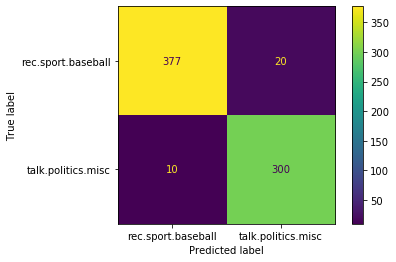

In [33]:
plot_confusion_matrix(model, X_test, y_test, display_labels = target_classes.values())
plt.show()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Test Accuracy: 0.9406
Logistic Regression Test F1-Score: 0.9309


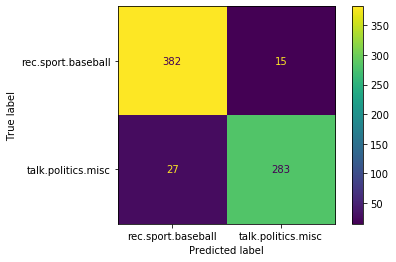

In [34]:
# for comparison...

from sklearn.linear_model import LogisticRegression

# Instantiating our model - just using default values
logreg = LogisticRegression(random_state=123)
# Fitting our model
logreg.fit(X_train,y_train)
# Making predictions on our test set
y_preds_lr = logreg.predict(X_test)

# How'd we do?
print(f'Logistic Regression Test Accuracy: {accuracy_score(y_test, y_preds_lr):.4f}')
print(f'Logistic Regression Test F1-Score: {f1_score(y_test, y_preds_lr):.4f}')

plot_confusion_matrix(logreg, X_test, y_test, display_labels = target_classes.values())
plt.show()

Untuned Random Forest Test Accuracy: 0.9335
Untuned Random Forest Test F1-Score: 0.9191


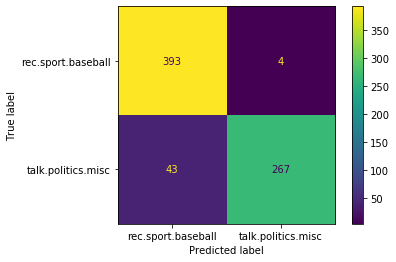

In [35]:
# another comparison...

from sklearn.ensemble import RandomForestClassifier

# Instantiating our model - just using default values
rf = RandomForestClassifier(random_state=123)
# Fitting our model
rf.fit(X_train,y_train)
# Making predictions on our test set
y_preds_rf = rf.predict(X_test)

# How'd we do?
print(f'Untuned Random Forest Test Accuracy: {accuracy_score(y_test, y_preds_rf):.4f}')
print(f'Untuned Random Forest Test F1-Score: {f1_score(y_test, y_preds_rf):.4f}')

plot_confusion_matrix(rf, X_test, y_test, display_labels = target_classes.values())
plt.show()